<body><b>The main aim of this analysis is to find the best time to release the genetically modified mosquitoes which when mated produce less offsprings and help in reducing the mosquito populations. As this process is very costly, it needs perfect analysis like best time of the year to implement the strategy and correct count of mosquitoes required as less might not affect the existing population and large numbers are too expensive.</b></body>
<br><br>
<body>here we have 4 parametrs 
<li>The duration of release, here 180 days (6 months)</li>
    <li>The frequency of release : currently every 7 Days </li>
    <li>release start day: every 30 days like starting from jan as day 0 and ending dec 334 days toatl of 365 days </li>
    <li>The count of release ranging from 25 mosquitoes to 400 mosquitoes for every release </li>
    <li><b>NOTE:</b> the count of mosquitoes is proportion of population to reduce the load on numerical computations and faster experiments</li>
</body>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import statistics
import numpy as np
# ratio_list=[0.5,1,2]
last_day=180
freq_list=[7]
intervention_days=[0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
duration=[180]
fixed_insertions= [25, 50, 75, 100, 125, 150, 200, 300, 400]
# print(df.iat[0,0])
parent_path="D:/CEPH_LAB/stage_3_sims/results_for_paper/baseline_results/"

#code for multi_index
keys_list=[]
df_list=[]

median_df = pd.DataFrame()
i=0
column_cntr=0
df_results=pd.DataFrame()
df_before_intervention=pd.DataFrame()
for i_d in intervention_days:
    for fl in freq_list:
        for f_i in fixed_insertions:
            for dur in duration:
                new_folder=str(f"{f_i:04d}")+"_"+str(f"{fl:02d}")+"_"+str(f"{i_d:03d}")+"_"+str(f"{dur:03d}")
                new_series_median=pd.Series(name=new_folder,dtype=int)
                median_list=[]
                bfor_series=pd.Series(name=new_folder,dtype=int)
                bfor_series.name=new_folder
                
                total_path=os.path.join(parent_path, new_folder) #path for storing the results
                for cntr in range(0,100):
                    # if cntr==41:
                    #     continue
                    sim_name="simulation_"+str(cntr)+".csv"
                    path_with_csv=os.path.join(total_path,sim_name)
                    df=pd.read_csv(path_with_csv)
                    
                    ###---code for converting and creating dates and week number
                    reference_date=pd.Timestamp('2021-01-01')
                    df['timedelta']=pd.to_timedelta(df['time'],unit='D')
                    df['dates']=reference_date+df['timedelta']
                    df=df.drop(columns=['timedelta'])

                    
                    df['Date'] = pd.to_datetime(df['dates'])
                    df['Week'] = df['Date'].dt.isocalendar().week
                    ###-- end

                    if df['time'].iloc[-1]>=i_d+dur:
                        df['Median_day_val']=df['Adult_female'].loc[dur+i_d]
                        temp_val= df['Adult_female'].loc[dur+i_d]
                        median_list.append(temp_val)
                    else:
                        df['Median_day_val']=0
                        temp_val=0
                        median_list.append(temp_val)

                    
                df_list.append(df)
                keys_list.append((dur, fl, i_d, f_i, cntr))


                median_val = np.median(median_list)
                new_row=pd.DataFrame({'scenario': [new_folder],'median_value': [median_val]})
                # median_df=median_df.append(new_row,ignore_index=True)
                median_df = pd.concat([median_df, new_row], ignore_index=True)
                # df_before_intervention[str(f_i)+"_"+str(i_d)]=bfor_series
                # df_results[str(f_i)+"_"+str(i_d)]=new_series
                column_cntr=column_cntr+1
names_list = ["duration", "frequency", "start_date", "nr_insertions", "sim_nr"]
big_df = pd.concat(df_list, keys=keys_list, names=names_list)

In [4]:
index_names_list=names_list+['days']
big_df.index.names=index_names_list


big_df=big_df.rename_axis(index={5:'day'})

target_week_day=5
big_df['week_ref']=big_df['Date']+pd.to_timedelta((target_week_day-big_df['Date'].dt.weekday)%7, unit='d')



## these are the values of all stages of mosquitoes like egg, pupe, larve, adult male and female.
<body><b>Since female are the only one's that bite  so we will care the count of female mosquitoes only</b></body>
<li>each row contains the count of each stage of mosquito over 2 years starting jan 2021 to Dec 2022 from my Statistical Model which has an accuracy of 92% with real world values</li>

In [5]:
big_df

time  Egg  Larve  \
duration frequency start_date nr_insertions sim_nr days                     
180      7         0          25            99     0        0  326    135   
                                                   1        1  165    185   
                                                   2        2  178    200   
                                                   3        3  196    213   
                                                   4        4  151    221   
...                                                       ...  ...    ...   
                   334        400           99     536    536    0      0   
                                                   537    537    0      0   
                                                   538    538    0      0   
                                                   539    539    0      0   
                                                   540    540    0      0   

                                                         Pupe  Adult_male  \
duration frequency start_date nr_insertions sim_nr days                     
180      7         0          25            99     0       33         169   
                                                   1       37         146   
                                                   2       45         142   
                                                   3       47         130   
                                                   4       45         111   
...                                                       ...         ...   
                   334        400           99     536      0          11   
                                                   537      0           9   
                                                   538      0           8   
                                                   539      0           4   
                                                   540      0           2   

                                                         Adult_female  \
duration frequency start_date nr_insertions sim_nr days                 
180      7         0          25            99     0               90   
                                                   1               86   
                                                   2               73   
                                                   3               67   
                                                   4               66   
...                                                               ...   
                   334        400           99     536              0   
                                                   537              0   
                                                   538              0   
                                                   539              0   
                                                   540              0   

                                                         MALE_DD  MALE_DR  \
duration frequency start_date nr_insertions sim_nr days                     
180      7         0          25            99     0           0        0   
                                                   1          25        0   
                                                   2          19        0   
                                                   3          16        0   
                                                   4          12        0   
...                                                          ...      ...   
                   334        400           99     536        15        0   
                                                   537        11        0   
                                                   538         9        0   
                                                   539         8        0   
                                                   540         4        0   

                                                         MALE_RR  \
duration frequency start_date nr_

### Preprocessing of Data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os
parent_path="D:/CEPH_LAB/stage_3_sims/results_for_paper/no_intervention/"

#code for multi_index
keys_list=[]
df_list=[]
dur =180
i_d=0
i=0
column_cntr=0
df_results=pd.DataFrame()
df_before_intervention=pd.DataFrame()

for cntr in range(0,100):
    # if cntr==41:
    #     continue
    sim_name="simulation_"+str(cntr)+".csv"
    path_with_csv=os.path.join(parent_path,sim_name)
    df=pd.read_csv(path_with_csv)
    
    ###---code for converting and creating dates and week number
    reference_date=pd.Timestamp('2021-01-01')
    df['timedelta']=pd.to_timedelta(df['time'],unit='D')
    df['dates']=reference_date+df['timedelta']
    df=df.drop(columns=['timedelta'])
    
    df['Date'] = pd.to_datetime(df['dates'])
    df['Week'] = df['Date'].dt.isocalendar().week
    ###-- end
    if df['time'].iloc[-1]>=i_d+dur:
        df['Median_day_val']=df['Adult_female'].loc[dur+i_d]
        # new_series=pd.concat([new_series,pd.Series(df['Adult_female'].iloc[i_d+last_day])],ignore_index=True)
    else:
        df['Median_day_val']=0
        # new_series=pd.concat([new_series,pd.Series(0)],ignore_index=True)


    
    
    df_list.append(df)
    keys_list.append(cntr)


# df_before_intervention[str(f_i)+"_"+str(i_d)]=bfor_series
# df_results[str(f_i)+"_"+str(i_d)]=new_series
column_cntr=column_cntr+1
names_list1 = ["sim_nr"]
big_df_no_intervention = pd.concat(df_list, keys=keys_list, names=names_list1)

In [38]:
index_names_list1=names_list1+['days']
big_df_no_intervention.index.names=index_names_list1


big_df_no_intervention=big_df_no_intervention.rename_axis(index={1:'day'})

target_week_day=5
big_df_no_intervention['week_ref']=big_df_no_intervention['Date']+pd.to_timedelta((target_week_day-big_df_no_intervention['Date'].dt.weekday)%7, unit='d')

grouped_data_by_week_num=big_df_no_intervention.groupby(['sim_nr','week_ref'])

weekly_sum_df=grouped_data_by_week_num['Adult_female'].sum()
sim_nr_grouped_df=weekly_sum_df.groupby('week_ref')

mean_val_no_intervention=sim_nr_grouped_df.mean()
median_val_no_intervention=sim_nr_grouped_df.median()
max_val_no_intervention=median_val_no_intervention.max()
low_quantile_no_intervention=sim_nr_grouped_df.quantile(0.025)
high_quantile_no_intervention=sim_nr_grouped_df.quantile(0.975)

## one Scenario

<body> below is one of the scenario where mosquitoes are released every <b>7 days</b> for <b>180 days(6 months)</b> starting <b>feburary</b> and releasing <b>75 genetically modified mosquitoes</b> each time into the environment  </body>

In [39]:
vals=(180,7,31,75)
levels=('duration','frequency','start_date','nr_insertions')
scenario_try_df=big_df.xs(vals,level=levels)

# grouped_data_by_week_num=scenario_try_df.groupby(['sim_nr',scenario_try_df.index.get_level_values('days')//7])
grouped_data_by_week_num=scenario_try_df.groupby(['sim_nr','week_ref'])

weekly_sum_df=grouped_data_by_week_num['Adult_female'].sum()
sim_nr_grouped_df=weekly_sum_df.groupby('week_ref')

mean_val=sim_nr_grouped_df.mean()
median_val=sim_nr_grouped_df.median()
low_quantile=sim_nr_grouped_df.quantile(0.025)
high_quantile=sim_nr_grouped_df.quantile(0.975)

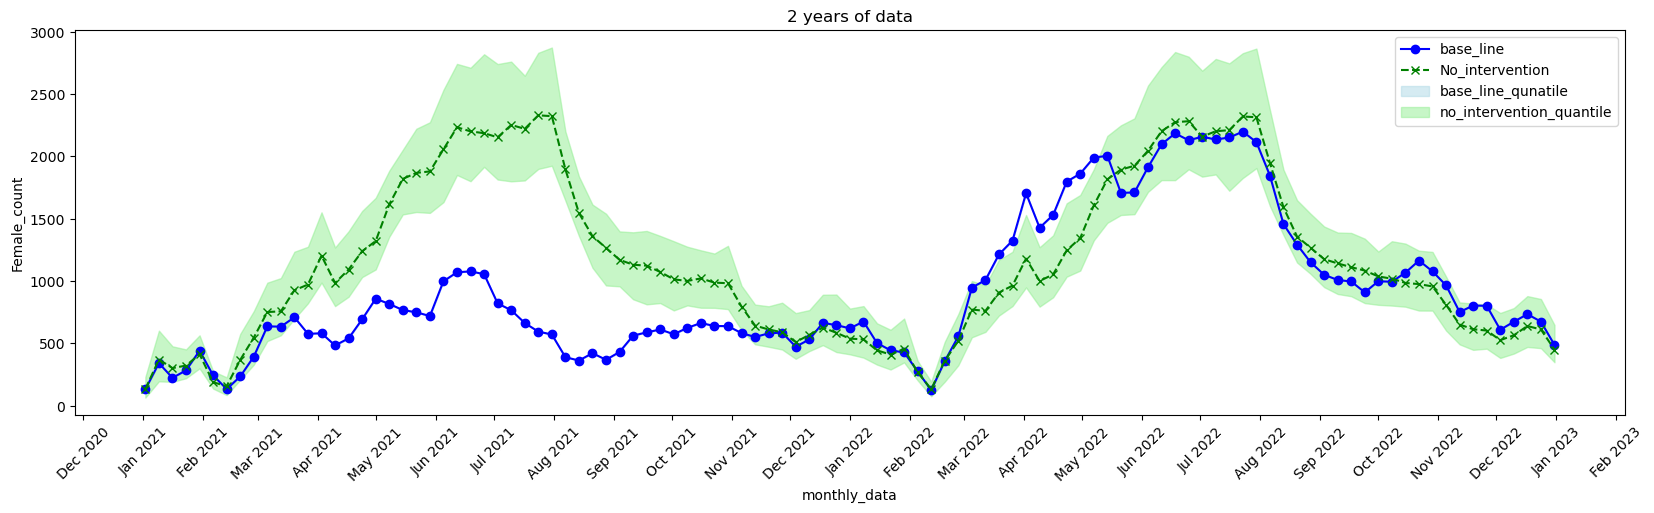

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime


# Create a figure and axis
fig, ax = plt.subplots(figsize=(20,5))

# Plot the data
ax.plot(median_val, marker='o', linestyle='-', color='blue', label='base_line')
ax.plot(median_val_no_intervention, marker='x', linestyle='--', color='green', label='No_intervention')
# Create a MonthLocator
month_locator = mdates.MonthLocator()

# Set the x-axis major locator to the MonthLocator
ax.xaxis.set_major_locator(month_locator)

# Format the x-axis labels for the months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and a title
ax.set_xlabel('monthly_data')
ax.set_ylabel('Female_count')
ax.set_title('2 years of data')

ax.fill_between( low_quantile.index,low_quantile,high_quantile, color='lightblue', alpha=0.5, label='base_line_qunatile')
ax.fill_between( low_quantile_no_intervention.index,low_quantile_no_intervention,high_quantile_no_intervention, color='lightgreen', alpha=0.5, label='no_intervention_quantile')
ax.legend()

# Show the plot
plt.show()


<body><b> explination for above plot</b>:
the green plot is general population of female mosquiotes without experiments<br>
The blue plot is the after the release of mosquitoes , we can observe that the populations are declining from march which is one month after the start of release. They continue to decline until 6 months and after that they go back to same populations as before.<br>
<b>Conclusion:</b>So it is not effective in reducing the populations while there is an increasing trend in the populations as in feburary 2021 </body>

<hr><br><br><hr>

## other Scenario

<body> below is other scenario where mosquitoes are released every <b>7 days</b> for <b>180 days(6 months)</b> starting <b>August 2021</b> and releasing <b>50 genetically modified mosquitoes</b> each time into the environment  </body>

In [41]:

#############
vals=(180,7,212,50)
levels=('duration','frequency','start_date','nr_insertions')
scenario_try_df=big_df.xs(vals,level=levels)

# grouped_data_by_week_num=scenario_try_df.groupby(['sim_nr',scenario_try_df.index.get_level_values('days')//7])
grouped_data_by_week_num=scenario_try_df.groupby(['sim_nr','week_ref'])

weekly_sum_df=grouped_data_by_week_num['Adult_female'].sum()
sim_nr_grouped_df=weekly_sum_df.groupby('week_ref')

mean_val=sim_nr_grouped_df.mean()
median_val=sim_nr_grouped_df.median()
low_quantile=sim_nr_grouped_df.quantile(0.025)
high_quantile=sim_nr_grouped_df.quantile(0.975)

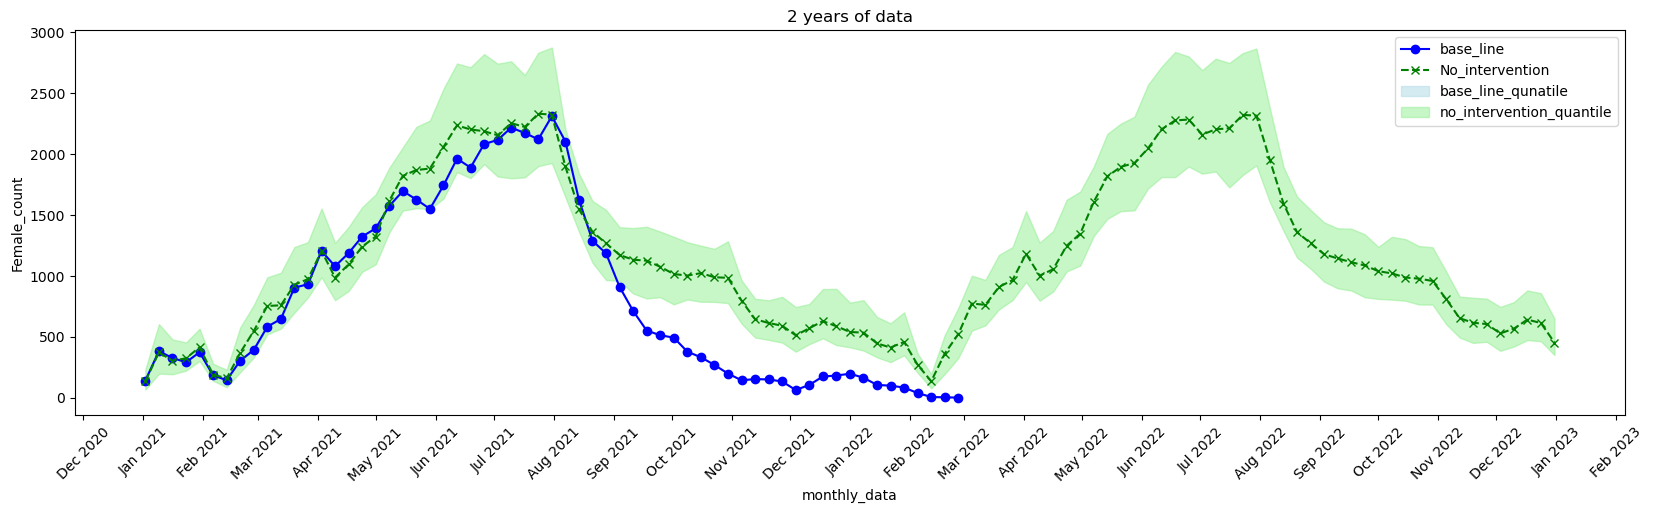

In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime


# Create a figure and axis
fig, ax = plt.subplots(figsize=(20,5))

# Plot the data
ax.plot(median_val, marker='o', linestyle='-', color='blue', label='base_line')
ax.plot(median_val_no_intervention, marker='x', linestyle='--', color='green', label='No_intervention')
# Create a MonthLocator
month_locator = mdates.MonthLocator()

# Set the x-axis major locator to the MonthLocator
ax.xaxis.set_major_locator(month_locator)

# Format the x-axis labels for the months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and a title
ax.set_xlabel('monthly_data')
ax.set_ylabel('Female_count')
ax.set_title('2 years of data')

ax.fill_between( low_quantile.index,low_quantile,high_quantile, color='lightblue', alpha=0.5, label='base_line_qunatile')
ax.fill_between( low_quantile_no_intervention.index,low_quantile_no_intervention,high_quantile_no_intervention, color='lightgreen', alpha=0.5, label='no_intervention_quantile')
ax.legend()

# Show the plot
plt.show()


<body><b> explination for above plot</b>:
the green plot is general population of female mosquiotes without experiments<br>
The blue plot is the after the release of mosquitoes , we can observe that the populations are declining from september which is one month after the start of release. They continue to decline until 6 months and the populaton is completely eradicated by March 2022.<br>
<br><b>Conclusion:</b>it is very much effective than the previous one where we released 75 mosquitoes every time and yet the population kept surviving but here we used only 50 mosquitoes every time and the population is completly vanished. So the analysis suggests that better to implement the technique during the declining trend of mosquitoes during August to January , where the mosquitoes will usually not survive due to cold weathers.</body>